In [1]:
import json
import requests
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

In [2]:
github_api = "https://api.github.com"
gh_session = requests.Session()
gh_session.auth = ("vasumathi298" ,"your_token")

In [3]:
url = github_api + '/repos/openstack/nova/commits'
commits = gh_session.get(url = url)
commits_json = commits.json()

In [4]:
commits_json

[{'sha': '452913a284a57a6d347c1e09c1a973faae9bccf2',
  'node_id': 'C_kwDOAAwOD9oAKDQ1MjkxM2EyODRhNTdhNmQzNDdjMWUwOWMxYTk3M2ZhYWU5YmNjZjI',
  'commit': {'author': {'name': 'Stephen Finucane',
    'email': 'stephenfin@redhat.com',
    'date': '2021-12-22T17:01:28Z'},
   'committer': {'name': 'Stephen Finucane',
    'email': 'stephenfin@redhat.com',
    'date': '2022-01-28T12:27:06Z'},
   'message': 'Remove Python 2-specific imports\n\nChange-Id: I64810898cd9126cf619df0b8f60e6fa01958943e\nSigned-off-by: Stephen Finucane <stephenfin@redhat.com>',
   'tree': {'sha': 'e83cd0889f1be1b60a7b816b5292449407b75aaf',
    'url': 'https://api.github.com/repos/openstack/nova/git/trees/e83cd0889f1be1b60a7b816b5292449407b75aaf'},
   'url': 'https://api.github.com/repos/openstack/nova/git/commits/452913a284a57a6d347c1e09c1a973faae9bccf2',
   'comment_count': 0,
   'verification': {'verified': False,
    'reason': 'unsigned',
    'signature': None,
    'payload': None}},
  'url': 'https://api.github.com/r

In [5]:
def commits_of_repo_github(repo, owner, api):
    commits = []
    next = True
    i = 1
    while next == True:
        url = api + '/repos/{}/{}/commits?page={}&per_page=100'.format(owner, repo, i)
        commit_pg = gh_session.get(url = url)
        commit_pg_list = [dict(item, **{'repo_name':'{}'.format(repo)}) for item in commit_pg.json()]    
        commit_pg_list = [dict(item, **{'owner':'{}'.format(owner)}) for item in commit_pg_list]
        commits = commits + commit_pg_list
        if 'Link' in commit_pg.headers:
            if 'rel="next"' not in commit_pg.headers['Link']:
                next = False
        i = i + 1
    return commits

In [6]:
def create_commits_df(repo, owner, api):
    commits_list = commits_of_repo_github(repo, owner, api)
    return json_normalize(commits_list)

In [7]:
commits = create_commits_df('nova', 'openstack', github_api)

C:\Users\hp\AppData\Local\Temp/ipykernel_44952/815428325.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  return json_normalize(commits_list)


In [8]:
commits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59402 entries, 0 to 59401
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sha                            59402 non-null  object 
 1   node_id                        59402 non-null  object 
 2   url                            59402 non-null  object 
 3   html_url                       59402 non-null  object 
 4   comments_url                   59402 non-null  object 
 5   parents                        59402 non-null  object 
 6   repo_name                      59402 non-null  object 
 7   owner                          59402 non-null  object 
 8   commit.author.name             59402 non-null  object 
 9   commit.author.email            59402 non-null  object 
 10  commit.author.date             59402 non-null  object 
 11  commit.committer.name          59402 non-null  object 
 12  commit.committer.email         59402 non-null 

In [9]:
commits['date'] =  pd.to_datetime(commits['commit.committer.date'])
commits['date'] =  pd.to_datetime(commits['date'], utc=True)
commits['commit_date'] = commits['date'].dt.date
commits['commit_year'] = commits['date'].dt.year
commits['commit_hour'] = commits['date'].dt.hour

In [10]:
commits.head()

,sha,node_id,url,html_url,comments_url,parents,repo_name,owner,commit.author.name,commit.author.email,...,committer.events_url,committer.received_events_url,committer.type,committer.site_admin,author,committer,date,commit_date,commit_year,commit_hour
0,452913a284a57a6d347c1e09c1a973faae9bccf2,C_kwDOAAwOD9oAKDQ1MjkxM2EyODRhNTdhNmQzNDdjMWUw...,https://api.github.com/repos/openstack/nova/co...,https://github.com/openstack/nova/commit/45291...,https://api.github.com/repos/openstack/nova/co...,[{'sha': '0396bba4ccfeed74e684da5355fcd17ce997...,nova,openstack,Stephen Finucane,stephenfin@redhat.com,...,https://api.github.com/users/stephenfin/events...,https://api.github.com/users/stephenfin/receiv...,User,False,NaN,NaN,2022-01-28 12:27:06+00:00,2022-01-28,2022,12
1,0396bba4ccfeed74e684da5355fcd17ce997218e,C_kwDOAAwOD9oAKDAzOTZiYmE0Y2NmZWVkNzRlNjg0ZGE1...,https://api.github.com/repos/openstack/nova/co...,https://github.com/openstack/nova/commit/0396b...,https://api.github.com/repos/openstack/nova/co...,[{'sha': '125a8530ccd42dd1fd11cb883ac088acdd3a...,nova,openstack,Stephen Finucane,stephenfin@redhat.com,...,https://api.github.com/users/stephenfin/events...,https://api.github.com/users/stephenfin/receiv...,User,False,NaN,NaN,2022-01-28 12:26:53+00:00,2022-01-28,2022,12
2,125a8530ccd42dd1fd11cb883ac088acdd3af062,C_kwDOAAwOD9oAKDEyNWE4NTMwY2NkNDJkZDFmZDExY2I4...,https://api.github.com/repos/openstack/nova/co...,https://github.com/openstack/nova/commit/125a8...,https://api.github.com/repos/openstack/nova/co...,[{'sha': 'f87a63a46e9ebae260d9ff8cb140d2c93bed...,nova,openstack,Zuul,zuul@review.opendev.org,...,https://api.github.com/users/openstack-gerrit/...,https://api.github.com/users/openstack-gerrit/...,User,False,NaN,NaN,2022-01-25 15:12:32+00:00,2022-01-25,2022,15
3,f87a63a46e9ebae260d9ff8cb140d2c93bed4e1e,C_kwDOAAwOD9oAKGY4N2E2M2E0NmU5ZWJhZTI2MGQ5ZmY4...,https://api.github.com/repos/openstack/nova/co...,https://github.com/openstack/nova/commit/f87a6...,https://api.github.com/repos/openstack/nova/co...,[{'sha': '555d859be763fde2c51a900ca416d23d34f1...,nova,openstack,Zuul,zuul@review.opendev.org,...,https://api.github.com/users/openstack-gerrit/...,https://api.github.com/users/openstack-gerrit/...,User,False,NaN,NaN,2022-01-25 01:34:55+00:00,2022-01-25,2022,1
4,555d859be763fde2c51a900ca416d23d34f10492,C_kwDOAAwOD9oAKDU1NWQ4NTliZTc2M2ZkZTJjNTFhOTAw...,https://api.github.com/repos/openstack/nova/co...,https://github.com/openstack/nova/commit/555d8...,https://api.github.com/repos/openstack/nova/co...,[{'sha': 'b9b1b4fa657b20f4cde80c6e4d5617fc9593...,nova,openstack,Zuul,zuul@review.opendev.org,...,https://api.github.com/users/openstack-gerrit/...,https://api.github.com/users/openstack-gerrit/...,User,False,NaN,NaN,2022-01-25 00:48:05+00:00,2022-01-25,2022,0


In [11]:
commits.dtypes

sha                          object
node_id                      object
url                          object
html_url                     object
comments_url                 object
                       ...         
committer                   float64
date            datetime64[ns, UTC]
commit_date                  object
commit_year                   int64
commit_hour                   int64
Length: 65, dtype: object

In [12]:
commits['commit.message']

0        Remove Python 2-specific imports\n\nChange-Id:...
1        requirements: Remove os-xenapi\n\nWe no longer...
2        Merge "libvirt: Create qcow2 disks with the co...
3                           Merge "Add check job for FIPS"
4        Merge "block_device: Ignore VolumeAttachmentNo...
                               ...                        
59397                removed reference to nonexistent flag
59398    Josh's networking refactor, modified to work w...
59399        Merged Vish's work on adding projects to nova
59400                                 missed the gitignore
59401                                       initial commit
Name: commit.message, Length: 59402, dtype: object

In [13]:
commits_by_hour = commits.groupby('commit_hour')[['sha']].count()
commits_by_hour = commits_by_hour.rename(columns = {'sha': 'commit_count'})

In [14]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [15]:
fig = go.Figure([go.Bar(
    x=commits_by_hour.index, 
    y=commits_by_hour.commit_count, 
    text=commits_by_hour.commit_count, 
    textposition='auto')])
fig.update_layout(
    title = 'Commits by Hour', 
    xaxis_title = 'Hour', 
    yaxis_title = 'Commits Count', 
    xaxis_tickmode = 'linear')
fig.show()

In [16]:
commits_by_day = commits.groupby('commit_date')[['sha']].count()
commits_by_day = commits_by_day.rename(columns = {'sha': 'commit_count'})
fig = go.Figure([go.Scatter(
    x=commits_by_day.index, 
    y=commits_by_day.commit_count, 
    text=commits_by_day.commit_count, 
    fill='tozeroy')])
fig.update_layout(
    title = 'Commits by Years', 
    xaxis_title = 'Years', 
    yaxis_title = 'Commits Count')
fig.show()

In [17]:
mask = (commits['commit_date'] > pd.to_datetime('2021-07-29').date()) & (commits['commit_date'] <= pd.to_datetime('2022-01-28').date())
commit_within_six_months=commits.loc[mask]

In [18]:
commits_by_day = commit_within_six_months.groupby('commit_date')[['sha']].count()
commits_by_day = commits_by_day.rename(columns = {'sha': 'commit_count'})
fig = go.Figure([go.Scatter(
    x=commits_by_day.index, 
    y=commits_by_day.commit_count, 
    text=commits_by_day.commit_count, 
    fill='tozeroy')])
fig.update_layout(
    title = 'Commits by Last Six months', 
    xaxis_title = 'Months', 
    yaxis_title = 'Commits Count')
fig.show()

In [30]:
commits_by_author = commits.groupby('author.login')[['sha']].count()
commits_by_author = commits_by_author.rename(columns = {'sha': 'commit_count'})
commits_by_author = commits_by_author.sort_values(by='commit_count', ascending=False)
top_authors = commits_by_author.head(30)
fig = go.Figure([go.Bar(
    x=top_authors.index, 
    y=top_authors.commit_count)])
fig.update_layout(
    title = 'Top Committers', 
    xaxis_title = 'Author', 
    yaxis_title = 'Commits Count', 
    xaxis_tickmode = 'linear',
    xaxis_tickangle=-40)
fig.show()

In [19]:
from pydriller import Repository

In [20]:
import datetime
dt1 = datetime.datetime(2021, 7 , 29, 0, 0, 0)
dt2 = datetime.datetime(2022, 1, 28 , 0, 0, 0)
for commit in Repository('https://github.com/openstack/nova',since=dt1, to=dt2).traverse_commits():
    print(f"{commit.committer_date} - {commit.hash} - {commit.author.name}")

2021-07-29 12:46:28+01:00 - 48f35058fe6f821644b4b188a1273a4d8e547d78 - zhufl
2021-07-30 15:10:40+02:00 - a3d0aa477288cf5b0991690baadb4e2d1db00d82 - Artom Lifshitz
2021-07-30 13:25:51+00:00 - 5ddaf36f3bec6910c59e3ec59d83b4e3a8d3d59c - Zuul
2021-07-30 17:57:47+00:00 - 35ddf1ad40207dee681a3c92cc9e86b061234edd - Zuul
2021-07-30 17:57:54+00:00 - 5a56ac42ad24d74a2bc150769fd2d2fdcbfa3fd6 - Zuul
2021-07-31 00:35:38+00:00 - 214cabe6848a1fdb4f5941d994c6cc11107fc4af - melanie witt
2021-07-31 16:01:32+00:00 - 39ef1ad774859562183190f74831a115698e6836 - melanie witt
2021-08-03 10:06:25+01:00 - dbf3e276ba5971f1f6483e04b84cb0fc403cd592 - Lee Yarwood
2021-08-03 16:54:54+02:00 - ff4d0d002a35022df1cb71029ad82ad8f3b327df - Sylvain Bauza
2021-08-04 11:37:26+00:00 - 49ba5a763f9d2c7c496f391ca8149a18541bfec7 - Lee Yarwood
2021-08-04 12:37:43+01:00 - 2209b0007fe85d7c5439e0bfdfe2120c63898fa2 - Felix Huettner
2021-08-04 12:37:43+01:00 - 753a2ae5d4159db3ee3ca06388193fe2c436fc66 - Lee Yarwood
2021-08-04 12:37:43+0

In [21]:
from pydriller.metrics.process.commits_count import CommitsCount
from pprint import pprint
metric = CommitsCount(path_to_repo='https://github.com/openstack/nova',
                    from_commit='48f35058fe6f821644b4b188a1273a4d8e547d78',
                    to_commit='125a8530ccd42dd1fd11cb883ac088acdd3af062')
files = metric.count()
pprint(files)

{None: 15,
 '.gitignore': 1,
 '.pre-commit-config.yaml': 1,
 '.zuul.yaml': 14,
 'HACKING.rst': 1,
 'api-guide\\source\\accelerator-support.rst': 1,
 'api-guide\\source\\port_with_resource_request.rst': 5,
 'api-ref\\source\\os-cells.inc': 1,
 'api-ref\\source\\os-volume-attachments.inc': 1,
 'api-ref\\source\\parameters.yaml': 4,
 'api-ref\\source\\servers-actions.inc': 2,
 'api-ref\\source\\servers.inc': 1,
 'doc\\api_samples\\os-volumes\\v2.89\\attach-volume-to-server-req.json': 1,
 'doc\\api_samples\\os-volumes\\v2.89\\attach-volume-to-server-resp.json': 1,
 'doc\\api_samples\\os-volumes\\v2.89\\list-volume-attachments-resp.json': 1,
 'doc\\api_samples\\os-volumes\\v2.89\\update-volume-attachment-delete-flag-req.json': 1,
 'doc\\api_samples\\os-volumes\\v2.89\\volume-attachment-detail-resp.json': 1,
 'doc\\api_samples\\servers\\v2.90\\server-action-rebuild-resp.json': 1,
 'doc\\api_samples\\servers\\v2.90\\server-action-rebuild.json': 1,
 'doc\\api_samples\\servers\\v2.90\\server-cr

In [22]:
from pydriller.metrics.process.lines_count import LinesCount
metric = LinesCount(path_to_repo='https://github.com/openstack/nova',
                    from_commit='48f35058fe6f821644b4b188a1273a4d8e547d78',
                    to_commit='125a8530ccd42dd1fd11cb883ac088acdd3af062')
 
added_count = metric.count_added()
removed_count = metric.count_removed()
 
print('Total lines added per file:')
pprint(added_count)
print('Total lines removed per file:')
pprint(removed_count)

Total lines added per file:
{None: 0,
 '.gitignore': 5,
 '.pre-commit-config.yaml': 6,
 '.zuul.yaml': 71,
 'HACKING.rst': 3,
 'api-guide\\source\\accelerator-support.rst': 54,
 'api-guide\\source\\port_with_resource_request.rst': 28,
 'api-ref\\source\\os-cells.inc': 14,
 'api-ref\\source\\os-volume-attachments.inc': 11,
 'api-ref\\source\\parameters.yaml': 51,
 'api-ref\\source\\servers-actions.inc': 12,
 'api-ref\\source\\servers.inc': 31,
 'doc\\api_samples\\os-volumes\\v2.89\\attach-volume-to-server-req.json': 7,
 'doc\\api_samples\\os-volumes\\v2.89\\attach-volume-to-server-resp.json': 10,
 'doc\\api_samples\\os-volumes\\v2.89\\list-volume-attachments-resp.json': 22,
 'doc\\api_samples\\os-volumes\\v2.89\\update-volume-attachment-delete-flag-req.json': 10,
 'doc\\api_samples\\os-volumes\\v2.89\\volume-attachment-detail-resp.json': 11,
 'doc\\api_samples\\servers\\v2.90\\server-action-rebuild-resp.json': 80,
 'doc\\api_samples\\servers\\v2.90\\server-action-rebuild.json': 15,
 'doc

In [23]:
type(added_count)

dict

In [33]:
type(files)

dict

In [24]:
def search(dictionary, substr):
    result = []
    summ=0
    for key in dictionary.keys():
        if str(key).find(substr) != -1:
            summ=dictionary[key]+summ
    return summ
print("Lines Added in Sub-directories Last 6 Months")
l_added=0
list1=[]
list_of_directories_added=['api-guide\\source','api-ref\\source','doc','etc\\nova','gate','nova','releasenotes','tools','devstack','playbooks','roles']
for i in range(len(list_of_directories_added)):
    a=search(added_count, list_of_directories_added[i])
    list1.append(a)
    l_added=l_added+a
    print(list_of_directories_added[i]+" : "+str(a))
print("In Root Directory"+" : "+str(l_added-sum(added_count.values())))
list1.append(int(l_added-sum(added_count.values())))

l_removed=0
list2=[]
print("Lines Removed in Sub-directories Last 6 Months")
for i in range(len(list_of_directories_added)):
    a=search(removed_count, list_of_directories_added[i])
    list2.append(a)
    l_removed=l_removed+a
    print(list_of_directories_added[i]+" : "+str(a))
print("In Root Directory"+" : "+str(sum(removed_count.values())-l_removed))
list2.append(int(l_added-sum(removed_count.values())))

Lines Added in Sub-directories Last 6 Months
api-guide\source : 82
api-ref\source : 119
doc : 2941
etc\nova : 1
gate : 199
nova : 28030
releasenotes : 428
tools : 9
devstack : 0
playbooks : 0
roles : 0
In Root Directory : 204
Lines Removed in Sub-directories Last 6 Months
api-guide\source : 18
api-ref\source : 50
doc : 429
etc\nova : 2
gate : 97
nova : 13448
releasenotes : 9
tools : 4
devstack : 0
playbooks : 0
roles : 0
In Root Directory : 6793


In [37]:
l=[]
l_c=0
for i in range(len(list_of_directories_added)):
    a=search(files, list_of_directories_added[i])
    l.append(a)
    l_c=l_c+a
    print(list_of_directories_added[i]+" : "+str(a))
print("In Root Directory"+" : "+str(sum(files.values())-l_c))


api-guide\source : 6
api-ref\source : 9
doc : 82
etc\nova : 3
gate : 15
nova : 1109
releasenotes : 38
tools : 5
devstack : 0
playbooks : 0
roles : 0
Root Directory : 0
In Root Directory : 26


In [25]:
churn_list=[]
for i in range(len(list1)):
    churn_list.append(list1[i]+list2[i])
list_of_directories_added.append("Root Directory")

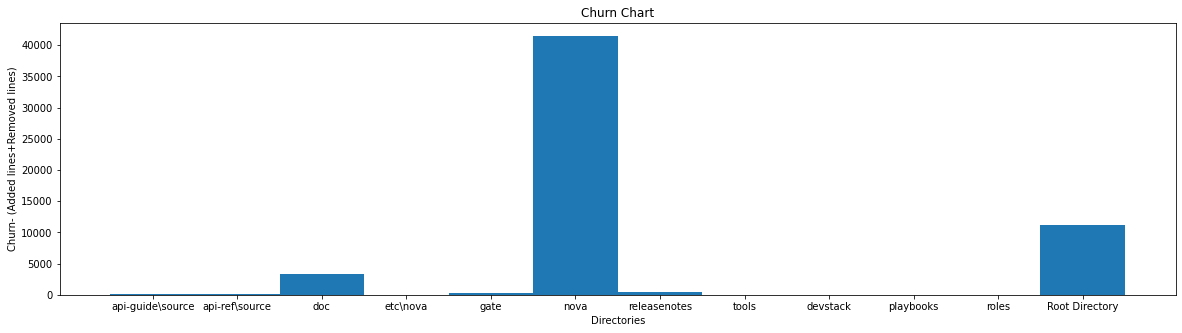

In [26]:
import matplotlib.pyplot as plt
left = [1, 2, 3, 4, 5 ,6 ,7,8,9,10,11,12]
plt.figure(figsize=(20, 5))
plt.bar(left, churn_list, tick_label = list_of_directories_added,
        width = 1.0)

plt.xlabel('Directories')
plt.ylabel('Churn- (Added lines+Removed lines)')
plt.title('Churn Chart')

# function to show the plot
plt.show()

In [27]:
from pydriller.metrics.process.code_churn import CodeChurn
metric = CodeChurn(path_to_repo='https://github.com/openstack/nova',
                   from_commit='48f35058fe6f821644b4b188a1273a4d8e547d78',
                    to_commit='125a8530ccd42dd1fd11cb883ac088acdd3af062')
files_count = metric.count()
files_max = metric.max()
files_avg = metric.avg()
print('Total code churn for each file: {}'.format(files_count))
print('Maximum code churn for each file: {}'.format(files_max))
print('Average code churn for each file: {}'.format(files_avg))

Total code churn for each file: {'nova\\api\\openstack\\wsgi_app.py': 12, 'nova\\conf\\workarounds.py': 26, 'nova\\service.py': 6, 'nova\\tests\\unit\\api\\openstack\\test_wsgi_app.py': 21, 'nova\\tests\\unit\\test_service.py': 24, '.zuul.yaml': 24, 'nova\\tests\\fixtures\\nova.py': 221, 'nova\\utils.py': 1, 'requirements.txt': -3, 'test-requirements.txt': 0, 'nova\\conf\\vnc.py': -9, 'releasenotes\\notes\\remove-deprecated-vnc-opts-c2bbcbf0fb777593.yaml': 10, 'nova\\hacking\\checks.py': 91, 'nova\\tests\\unit\\test_hacking.py': 87, 'tox.ini': 20, 'nova\\tests\\functional\\libvirt\\test_live_migration.py': 117, 'nova\\virt\\libvirt\\driver.py': 162, 'nova\\virt\\libvirt\\guest.py': 10, 'releasenotes\\notes\\announce-self-post-live-migration-936721b1ab887514.yaml': 8, 'nova\\exception.py': 31, 'setup.cfg': 1, 'nova\\tests\\functional\\test_aggregates.py': 101, 'nova\\tests\\unit\\virt\\zvm\\test_driver.py': 4, 'nova\\tests\\unit\\virt\\zvm\\test_guest.py': 0, 'nova\\tests\\unit\\virt\\z

In [29]:
from pydriller.metrics.process.lines_count import LinesCount
metric = LinesCount(path_to_repo='https://github.com/openstack/nova',
                   from_commit='48f35058fe6f821644b4b188a1273a4d8e547d78',
                    to_commit='125a8530ccd42dd1fd11cb883ac088acdd3af062')
added_count = metric.count_added()
added_max = metric.max_added()
added_avg = metric.avg_added()
print('Total lines added per file: {}'.format(added_count))
print('Maximum lines added per file: {}'.format(added_max))
print('Average lines added per file: {}'.format(added_avg))

Total lines added per file: {'nova\\api\\openstack\\wsgi_app.py': 15, 'nova\\conf\\workarounds.py': 90, 'nova\\service.py': 7, 'nova\\tests\\unit\\api\\openstack\\test_wsgi_app.py': 26, 'nova\\tests\\unit\\test_service.py': 24, '.zuul.yaml': 71, 'nova\\tests\\fixtures\\nova.py': 411, 'nova\\utils.py': 36, 'requirements.txt': 4, 'test-requirements.txt': 1, 'nova\\conf\\vnc.py': 0, 'releasenotes\\notes\\remove-deprecated-vnc-opts-c2bbcbf0fb777593.yaml': 10, 'nova\\hacking\\checks.py': 93, 'nova\\tests\\unit\\test_hacking.py': 87, 'tox.ini': 36, 'nova\\tests\\functional\\libvirt\\test_live_migration.py': 117, 'nova\\virt\\libvirt\\driver.py': 269, 'nova\\virt\\libvirt\\guest.py': 10, 'releasenotes\\notes\\announce-self-post-live-migration-936721b1ab887514.yaml': 8, 'nova\\exception.py': 73, 'setup.cfg': 3, 'nova\\tests\\functional\\test_aggregates.py': 115, 'nova\\tests\\unit\\virt\\zvm\\test_driver.py': 9, 'nova\\tests\\unit\\virt\\zvm\\test_guest.py': 1, 'nova\\tests\\unit\\virt\\zvm\\t